# Regularized logistic regression

## Visualizing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

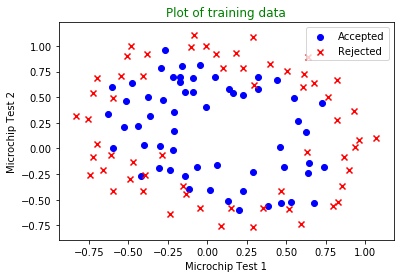

In [2]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
X = data[:, :-1]
y = data[:, -1:]

accepted_index = np.where(y.ravel() == 1)
rejected_index = np.where(y.ravel() == 0)

plt.scatter(X[accepted_index, 0], X[accepted_index, 1], marker='o', color='b', label='Accepted')
plt.scatter(X[rejected_index, 0], X[rejected_index, 1], marker='x', color='r', label='Rejected')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Plot of training data', color='g')
plt.legend(loc = 'upper right')
plt.show()

## Cost function and gradient

In [3]:
# add polynomial features to our data matrix (similar to polynomial regression).
def addPolynomialFeature(X1, X2):
    """添加多项式特征"""
    degree = 6
    feature = np.ones((X1.shape[0], 1))
    for i in np.arange(1, degree+1, 1):
        for j in np.arange(0, i+1, 1):
            new_feature = X1**(i-j) * X2**(j)
            feature = np.hstack((feature, new_feature))
    return feature

data = np.loadtxt('data/ex2data2.txt', delimiter=',')
X1 = data[:, 0:1]
X2 = data[:, 1:2]
y = data[:, -1:]
polynomial_X = addPolynomialFeature(X1, X2)

print(polynomial_X.shape)

(118, 28)


In [4]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

def h(theta, X):
    return sigmoid(np.dot(X, theta))

def computRegularizedCost(X, y, theta, lamb):
    """正则化梯度下降（cost+grad）计算"""
    m = X.shape[0]
    h_y = h(theta, X) - y
    theta_1 = theta[1:, :]
    
    J = -1./m * np.sum(y*np.log(h(theta, X)) + (1-y)*np.log(1-h(theta, X))) + lamb/(2*m) * np.sum(theta_1**2)
    grad = 1./m * np.dot(X.T, h_y)
    grad[1:, :] += lamb/m * theta_1
    return J, grad

initial_theta = np.zeros([polynomial_X.shape[1], 1])
cost, grad = computRegularizedCost(polynomial_X, y, initial_theta, 1)

print('\nCost at initial theta (zeros) Expected value: 0.693')
print('Computed value: ', cost)
print('grad.shape: ', grad.shape)


Cost at initial theta (zeros) Expected value: 0.693
Computed value:  0.69314718056
grad.shape:  (28, 1)


<img src="data/img/regularized.png" align="left"><img src="data/img/grad0.png" align="left"><img src="data/img/regularized_gd.png" align="left">

In [5]:
# batch gradient descent
def bgd(X, y, theta, alpha=0.1, iterations=5000, lamb=1):
    """正则化批量梯度下降"""
    J_history = np.zeros(iterations)
    for iter in range(iterations):
        cost, grad = computRegularizedCost(X, y, theta, lamb)
        J_history[iter] = cost
        theta = theta - alpha*grad
        if iter%500 ==0:
            print('iter=%d, cost=%f '% (iter, cost))
    return J_history, theta

J_history, optimize_theta = bgd(polynomial_X, y, initial_theta)
print('\noptimize_theta: ', optimize_theta)

iter=0, cost=0.693147 
iter=500, cost=0.553411 
iter=1000, cost=0.534416 
iter=1500, cost=0.530357 
iter=2000, cost=0.529370 
iter=2500, cost=0.529109 
iter=3000, cost=0.529035 
iter=3500, cost=0.529013 
iter=4000, cost=0.529006 
iter=4500, cost=0.529004 

optimize_theta:  [[ 1.27072257]
 [ 0.62430098]
 [ 1.18009252]
 [-2.0168194 ]
 [-0.91424006]
 [-1.42533745]
 [ 0.12414871]
 [-0.36570786]
 [-0.35839221]
 [-0.17453522]
 [-1.45801091]
 [-0.05298514]
 [-0.61540379]
 [-0.27386647]
 [-1.19244703]
 [-0.24170021]
 [-0.20671973]
 [-0.04649954]
 [-0.27726159]
 [-0.29522757]
 [-0.45864575]
 [-1.04353871]
 [ 0.02621636]
 [-0.29270822]
 [ 0.01441643]
 [-0.32723469]
 [-0.14335774]
 [-0.9275943 ]]


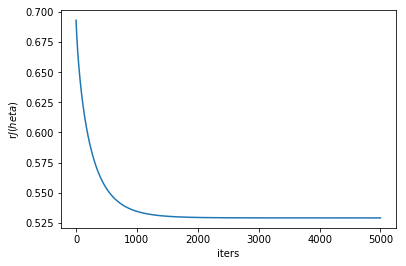

In [6]:
# 绘制代价函数J曲线
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('r$J(\theta)$')
plt.show()

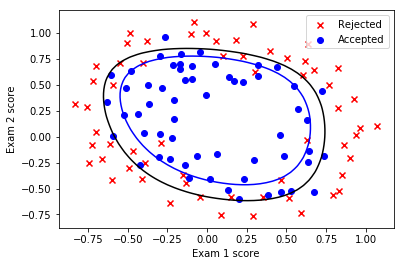

In [7]:
# 绘制决策边界
from sklearn.preprocessing import PolynomialFeatures
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
plt.scatter(X[rejected_index, 0], X[rejected_index, 1], marker='x', color = 'r', label = 'Rejected')
plt.scatter(X[accepted_index, 0], X[accepted_index, 1], marker='o', color = 'b', label = 'Accepted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')

poly = PolynomialFeatures(6)
x1Min = X[:, 0].min()
x1Max = X[:, 0].max()
x2Min = X[:, 1].min()
x2Max = X[:, 1].max()

xx1, xx2 = np.meshgrid(np.linspace(x1Min, x1Max), np.linspace(x2Min, x2Max))
h1 = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(optimize_theta)
h2 = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(optimize_theta))
h1 = h1.reshape(xx1.shape)
h2 = h2.reshape(xx1.shape)

plt.contour(xx1, xx2, h1, [0.5], colors='b')
plt.contour(xx1, xx2, h2, [0.5], colors='k')
plt.show()

In [8]:
# 决策函数
def predict(theta, X):
    predict_val = np.where(h(theta, X)>=0.5, 1.0, 0.)
    return predict_val

p = predict(optimize_theta, polynomial_X)
print('Expected accuracy (with lambda = 1): 83.1 (approx)')
print('Computed accuracy: ', (np.mean(p==y)*100))

Expected accuracy (with lambda = 1): 83.1 (approx)
Computed accuracy:  83.0508474576
